Lab - 1: Part - 2

Question - 1

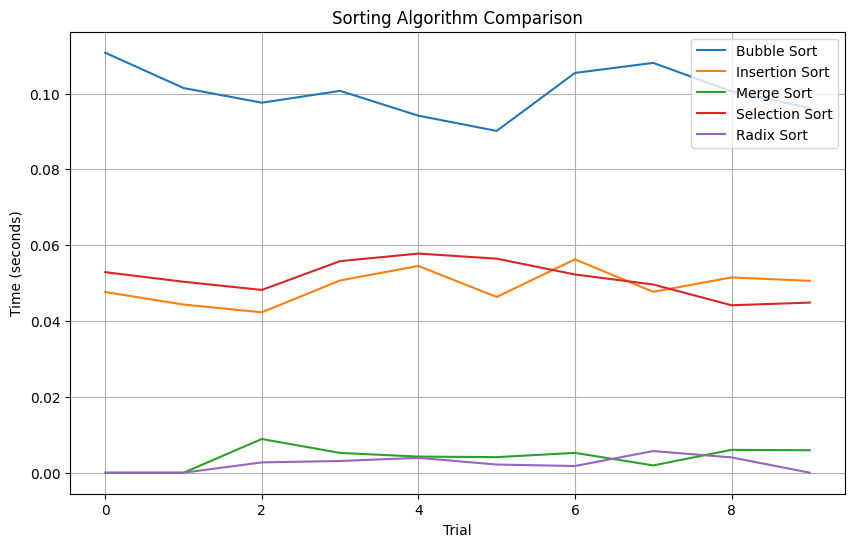

In [12]:
import random
import time
import matplotlib.pyplot as plt

# Function to generate random integers
def generate_random_numbers(n):
    return [random.randint(1, 10000) for _ in range(n)]

def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >=0 and key < arr[j] :
                arr[j+1] = arr[j]
                j -= 1
        arr[j+1] = key

def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)
        merge_sort(R)

        i = j = k = 0

        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1
        
    return arr

def selection_sort(arr):
    for i in range(len(arr)):
        min_idx = i
        for j in range(i+1, len(arr)):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]

def counting_sort(arr, exp):
    n = len(arr)
    output = [0] * n
    count = [0] * 10

    for i in range(n):
        index = arr[i] // exp
        count[index % 10] += 1

    for i in range(1, 10):
        count[i] += count[i - 1]

    i = n - 1
    while i >= 0:
        index = arr[i] // exp
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1
        i -= 1

    i = 0
    for i in range(len(arr)):
        arr[i] = output[i]

def radix_sort(arr):
    max_value = max(arr)
    exp = 1
    while max_value // exp > 0:
        counting_sort(arr, exp)
        exp *= 10

def compare_sorting_algorithms():
    algorithms = {
        "Bubble Sort": bubble_sort,
        "Insertion Sort": insertion_sort,
        "Merge Sort": merge_sort,
        "Selection Sort": selection_sort,
        "Radix Sort": radix_sort
    }

    times = {algo: [] for algo in algorithms}

    random_numbers = generate_random_numbers(1000)

    for _ in range(10):  
        for algo_name, algo_func in algorithms.items():
            arr_copy = random_numbers.copy()

            start_time = time.time()
            algo_func(arr_copy)
            end_time = time.time()

            times[algo_name].append(end_time - start_time)

    plt.figure(figsize=(10, 6))
    for algo_name, timings in times.items():
        plt.plot(timings, label=algo_name)

    plt.title('Sorting Algorithm Comparison')
    plt.xlabel('Trial')
    plt.ylabel('Time (seconds)')
    plt.legend()
    plt.grid(True)
    plt.show()


compare_sorting_algorithms()



question - 2

In [13]:
def merge_sorted_lists_merge_sort(sorted_lists):
    merged_list = []
    for lst in sorted_lists:
        merged_list.extend(lst)
    return merged_list

sorted_lists = [
    [1, 3, 5],
    [2, 4, 6],
    [0, 7, 8]
]

merged_list = merge_sorted_lists_merge_sort(sorted_lists)
sorted_list = merge_sort(merged_list)
print(sorted_list)


[0, 1, 2, 3, 4, 5, 6, 7, 8]


Question - 3

In [14]:
def find_k_largest_elements(arr, k):
    arr.sort(reverse=True)
    
    return arr[:k]

arr = [3, 1, 5, 12, 2, 11, 4, 7, 9]
k = 3
print(find_k_largest_elements(arr, k))


[12, 11, 9]


Question - 4

In [15]:
def max_activities(activities):
    sorted_activities = sorted(activities, key=lambda x: x[1])

    max_activities_count = 0
    current_activity_finish_time = float('-inf')

    for activity in sorted_activities:
        start_time, finish_time = activity

        if start_time >= current_activity_finish_time:
            max_activities_count += 1
            current_activity_finish_time = finish_time

    return max_activities_count

activities = [(1, 4), (3, 5), (0, 5)]
print(max_activities(activities)) 


1


Question - 5

In [16]:
def merge_intervals(intervals):
    if not intervals:
        return []

    intervals.sort(key=lambda x: x[0])

    merged = [intervals[0]]

    for interval in intervals[1:]:
        if interval[0] <= merged[-1][1]:
            merged[-1] = (merged[-1][0], max(merged[-1][1], interval[1]))
        else:
            merged.append(interval)

    return merged

def print_intervals(intervals):
    for interval in intervals:
        print(interval)

intervals = [(1, 3), (2, 6), (8, 10), (15, 18)]
merged_intervals = merge_intervals(intervals)
print_intervals(merged_intervals)


(1, 6)
(8, 10)
(15, 18)
